### k-means clustering

#### Introduction of the dataset

The dataset we will use for K-minus clustering is a dataset of some people's age and income. Our job will be to divide the people into different groups based on their age and income.

###### Name -> Name of the person
###### Age -> Age of the person
###### Income -> Income of the person

##### Load the dataset and necessary packages

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data-income-age-group.csv')
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


##### Categorical value can not scalized, so we have to drop the name column before scalized.

In [69]:
dfp = df.drop('Name', axis=1)

##### For K-minus clustering, we need to scale our dataset. For this we can adopt different methods. But here we will use max-min scalar.

In [70]:
scaler = MinMaxScaler()
scaler.fit(dfp)
scaled = pd.DataFrame(scaler.transform(dfp), columns=dfp.columns)
scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


###### In K-minus clustering, it is very difficult to estimate the value of K or the number of clusters, but we can easily find out through Elbo method.

C:\Users\Pappu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


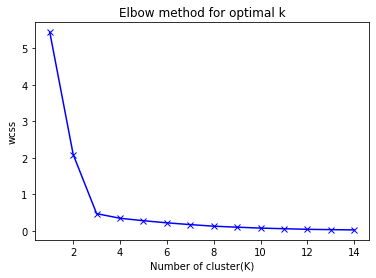

In [71]:
wcss = [] #within-cluster sum of square
k_range = range(1,15)
for k in k_range:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    wcss.append(km.inertia_)
    
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of cluster(K)')
plt.ylabel('wcss')
plt.title("Elbow method for optimal k")
plt.show()

##### If we see the plot when the value of k increase 1 to 2, he value of wcss dropped from 5 to 2. After increasing 2 to 3, he value of  wcss come down from 2 to 0.5. Since then the value of K has increased but the value of wcss has not decreased significantly. So we will take the value of K as 3 as the optimal value. 

##### Now we will divide our dataset into 3 clusters using clustering algorithm (since K=3 has been found).

In [72]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters = clusterNum, n_init= 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


In [73]:
df["cluster"] = labels
df.head(5)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [74]:
df.groupby('cluster').mean()

,Age,Income($)
cluster,,
0,28.333333,58611.111111
1,38.285714,150000.000000
2,40.500000,68666.666667


##### We see here that the average age of individuals in the first cluster is 28.33 years and the average income is 58611.11. The average age of individuals in the second cluster is 38.29 years and the average income is 150000.00. Individuals in the third cluster have an average age of 40.5 years and an average income is  68666.67.

In [75]:
frame = pd.DataFrame(scaled)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    9
1    7
2    6
Name: cluster, dtype: int64

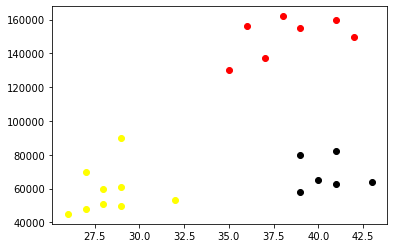

In [76]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='yellow')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')